<a href="https://colab.research.google.com/github/simpleParadox/PSYCO-576-Fall-2020/blob/master/PSYCO_576_ML_for_Psychology_DW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the first Data Workshop!**

In this workshop, we will look at some ways to inspect data and get feel for a sample brain imaging data. We will also be prepared for data workshop 2 where we will implement a machine learning pipeline.


###**Goals and learning objectives:**


1.   Inspect EEG and MEG data.
2.   Performing operations on the data.
3.   Visualize data.




We will use the 'mne' python package to work with EEG data. \\
https://mne.tools/stable/index.html \\
Full API reference: https://mne.tools/stable/python_reference.html \\



Dataset description: \\
https://mne.tools/stable/overview/datasets_index.html#sample
We will use this dataset because it has been well-studied and also provides a benchmark for any EEG/MEG related analysis.


Here's a link to various tutorials on how to read raw files.
https://mne.tools/stable/auto_examples/index.html#input-output


If you want to read fMRI files, the following packages might be helpful. \\
https://nipy.org/nibabel/ (for .img files) \\
https://pydicom.github.io/ (for files in DICOM format).


Paper that provides more in-depth understanding of the analysis.
https://www.frontiersin.org/articles/10.3389/fnins.2013.00267/full


**NOTE**: You are free to use any software package of your choice. MNE is widespread and will make your analyses easier.

Let's get it done!

In [ ]:
# Install necessary packages
!pip install mne

     |████████████████████████████████| 6.6MB 4.1MB/s 


In [ ]:
# First we will load the necessary ppython packages.
import numpy as np
import os
import mne

In [ ]:
# mne.__version__

'0.20.8'

Download the dataset into Google Colab. It will download the dataset first if you don't have it. \\
NOTE: The dataset size is ~ 1.5 GB so it might take a minute.
The dataset is stored in the ~/ root / mne_data directory in this colab notebook.

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()

Now let's load the raw files from the downloaded data. \\
You may see some variables such PCA-V1..., these are projection components that are used to account for the environmental noise in the MEG signals.

While implementing machine learning models, we will have to make sure that the data is cleaned.

Let's first read the data and store it in a python variable. The data is of type .fif which is a common brain-imaging data format. MNE also provides functions to read other types of data. \\
Here's a list of functions: https://mne.tools/stable/python_reference.html#reading-raw-data

In [ ]:
# Define the path. You can use this to read any file of the .fif format.
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)  # Read the raw .fif file.

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


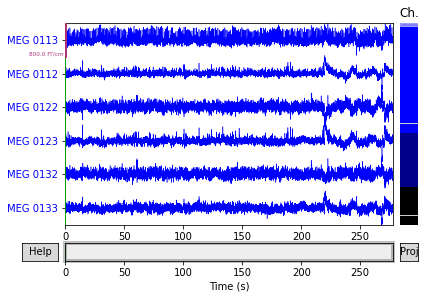

In [ ]:
fig = raw.plot(n_channels=6, duration=320)  # Adjust the number of channels to visualize different results.
fig.show()

Usually when we record data during the experiments, there is a lot of noise that sneaks in. Using various techniques, you clean up the data. We will use Independent Component Analysis. \\
Note: **This is just an example to show you that mne has inbuilt functions for preprocessing. We will not discuss ICA or any other techniques and leave it till the next data workshop.**

Todo: Explain ICA here

In [ ]:
# An example of using Independent Component Analysis to clean up data. We will inspect such techniques in more detail in the next workshop.
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)  # Initialize the ICA class.
ica.fit(raw)  # Fit the ICA model with the data. Get the components
ica.exclude = [1, 2]  # Components to exlcude.

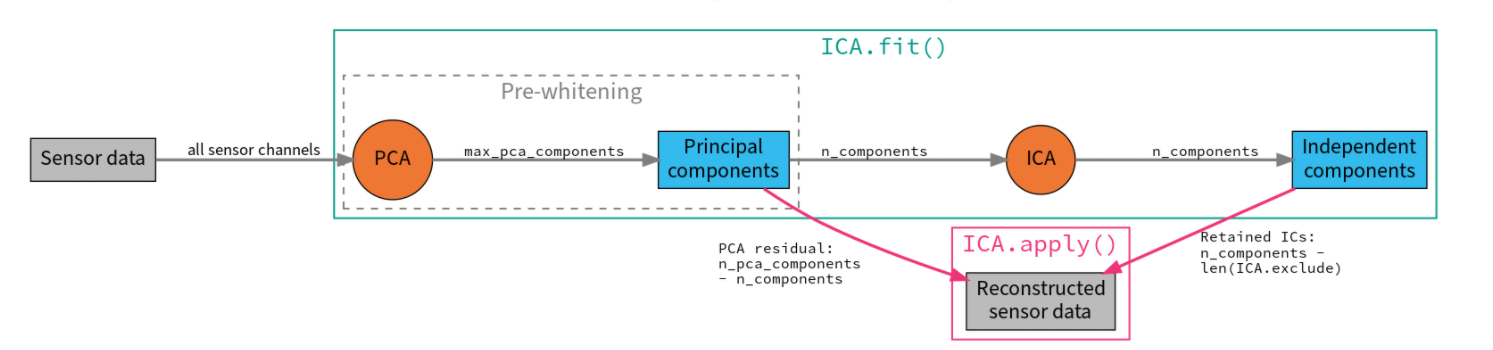

In the following cell we inspect how different the data after cleaning it up. Todo:

In [ ]:
#Make a copy of the original raw data.
orig_raw = raw.copy()
raw.load_data()  # Load the data into memory.
ica.apply(raw)  # Apply the ICA transformation.

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)